# Supplementary figure 4: 2D representation of GEx profiles (UMAP)

In this notebook, we explore if we are able to split the spatial regions using a unsupersived dimensionality reduction approach

In [1]:
global_path = './cell-cell-communication/' ## Path to the github downloaded repository

In [2]:
import scanpy as sc
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns
import numpy as np
from collections import Counter
from matplotlib.lines import Line2D
import sys
sys.path.insert(1, global_path + 'Functions/')
from downstream_analysis import obtain_adata_embeddings 


title_size = 12
labelout_size = 10
label_size = 8
ticks_size = 6

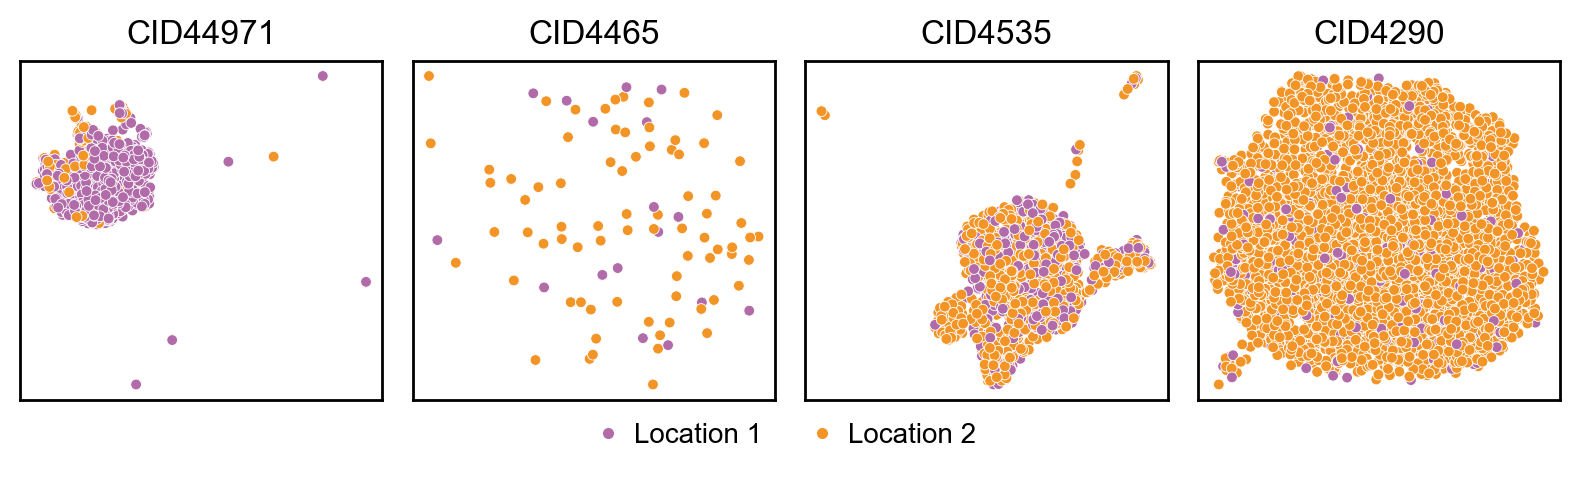

In [4]:
patients = ['CID44971', 'CID4465', 'CID4535', 'CID4290']
fig, axs = plt.subplots(1,4, figsize=(8,2.2), dpi=200, facecolor='white')
axs = axs.flatten()
for i, patient in enumerate(patients):
    adata_file = global_path + 'Data/Breast/Input_CP/'+patient+'_adata_cancer_region_ass.h5ad'
    adata = obtain_adata_embeddings(adata_file, ['#B16BA8', '#F39426'])
    axs[i] = sns.scatterplot(x=adata.obsm['X_umap'][:, 0], y=adata.obsm['X_umap'][:, 1], hue=adata.obs['celltype_loc'], palette=['#B16BA8', '#F39426'], s=15, ax = axs[i])
    axs[i].legend_.remove()
    axs[i].set_xticks([])
    axs[i].set_yticks([])
    axs[i].set_title(patient, fontsize=title_size)

color_value_dict = {'#B16BA8': 'Location 1', '#F39426': 'Location 2'}
legend_elements = [Line2D([0], [0], marker='o', color='w', label=color_value_dict[color], markersize=5, markerfacecolor=color) for color in color_value_dict]
fig.legend(handles=legend_elements, loc='lower center', ncol=len(color_value_dict),  bbox_to_anchor=(0.5, -0.1), frameon=False, fontsize=labelout_size, handlelength=0.3)
plt.tight_layout()


plt.savefig(global_path + 'UMAP_supplementary_Cancer.svg',format='svg', dpi=300 , bbox_inches='tight')
plt.savefig(global_path + 'UMAP_supplementary_Cancer.png',format='png', dpi=300, facecolor='white', edgecolor='none', bbox_inches='tight')